In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from scipy.stats import zscore
import plotly.express as px
import plotly.graph_objects as go

In [2]:
!pip install missingno


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
data = pd.read_csv("customer_data.csv")

In [6]:
print(data.head())   # First 5 rows
print(data.info())   # Data types & missing values
print(data.describe())  # Summary statistics

   ID  Year_Birth   Education Marital_Status     Income  Kidhome  Teenhome  \
0   1        1991         PhD       Together  148884.56        1         1   
1   2        1954  Graduation          Widow  167658.20        1         1   
2   3        2000    2n Cycle          Widow  149392.85        2         2   
3   4        1960    2n Cycle        Married   32855.81        0         2   
4   5        1963         PhD        Married  151918.44        0         1   

  Dt_Customer  Recency  Complain  ...  AcceptedCmp3  AcceptedCmp4  \
0  2017-03-26       78         0  ...             1             0   
1  2018-07-12       87         0  ...             0             0   
2  2015-04-11       88         0  ...             1             0   
3  2011-09-09        0         0  ...             0             0   
4  2018-05-31        6         0  ...             0             1   

   AcceptedCmp5  Response  NumWebPurchases  NumCatalogPurchases  \
0             0         0                9       

In [7]:
# Load the dataset
data = pd.read_csv("customer_data.csv")

# Check for missing values
missing_values = data.isnull().sum()

# Check for duplicate rows
duplicate_rows = data.duplicated().sum()

# Display results
print("🔹 Missing Values:\n", missing_values[missing_values > 0])
print("\n🔹 Duplicate Rows:", duplicate_rows)

🔹 Missing Values:
 Series([], dtype: int64)

🔹 Duplicate Rows: 0


In [8]:
print("\n🔹 Data Types:")
print(data.dtypes)


🔹 Data Types:
ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
Complain                 int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
AcceptedCmp1             int64
AcceptedCmp2             int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
Response                 int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Z_CostContact            int64
Z_Revenue                int64
dtype: object


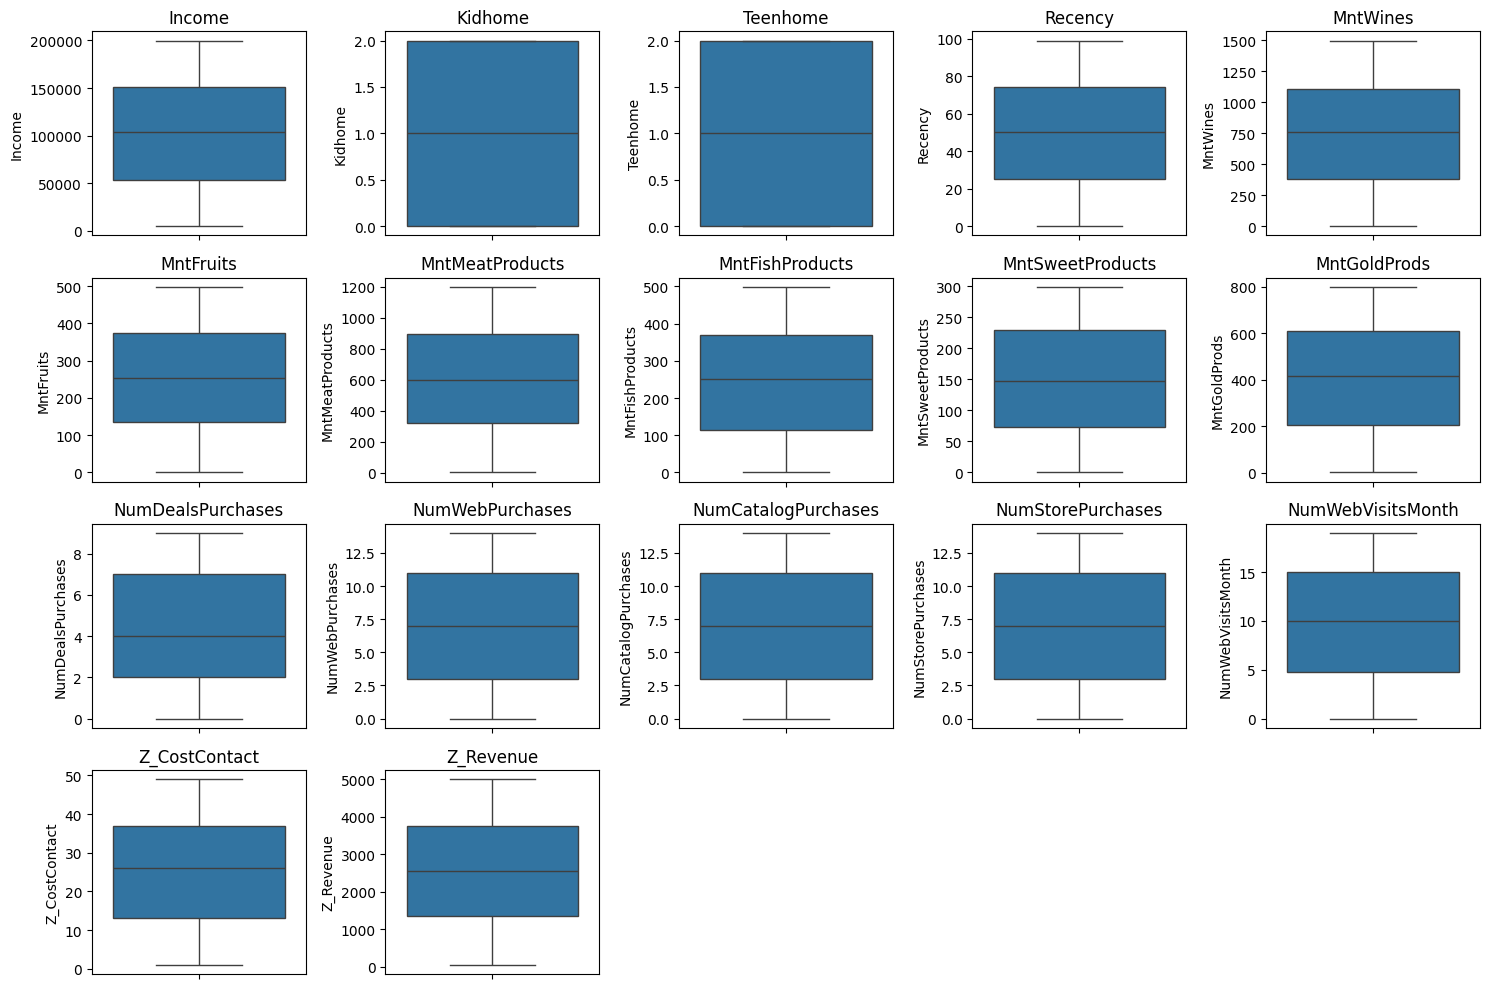

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for outlier detection
numerical_cols = [
    "Income", "Kidhome", "Teenhome", "Recency", "MntWines", "MntFruits",
    "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds",
    "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases",
    "NumStorePurchases", "NumWebVisitsMonth", "Z_CostContact", "Z_Revenue"
]

# Plot boxplots for numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [10]:
from datetime import datetime

# Convert 'Dt_Customer' to datetime format
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])

# Feature 1: Age
current_year = datetime.now().year
data["Age"] = current_year - data["Year_Birth"]

# Feature 2: Customer Tenure (in days)
data["Customer_Tenure"] = (datetime.now() - data["Dt_Customer"]).dt.days

# Feature 3: Total Spending (Sum of all product spending)
spending_cols = [
    "MntWines", "MntFruits", "MntMeatProducts",
    "MntFishProducts", "MntSweetProducts", "MntGoldProds"
]
data["Total_Spending"] = data[spending_cols].sum(axis=1)

# Feature 4: Purchase Frequency (Sum of all purchase counts)
purchase_cols = [
    "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"
]
data["Purchase_Frequency"] = data[purchase_cols].sum(axis=1)

# Feature 5: Profit Margin (Assumed 30% of Total Spending)
data["Profit_Margin"] = data["Total_Spending"] * 0.3

# Feature 6: Customer Lifetime Value (CLV) Estimation
# CLV = (Average Profit Margin per purchase) × (Purchase Frequency) × (Customer Tenure)
data["CLV"] = data["Profit_Margin"] * data["Purchase_Frequency"] * data["Customer_Tenure"]

# Display new features
display(data[["Age", "Customer_Tenure", "Total_Spending", "Purchase_Frequency", "Profit_Margin", "CLV"]].head())

,Age,Customer_Tenure,Total_Spending,Purchase_Frequency,Profit_Margin,CLV
0,34,2941,2089,31,626.7,57136865.7
1,71,2468,2263,18,678.9,30159453.6
2,25,3656,2197,38,659.1,91567444.8
3,65,4966,2333,31,699.9,107746805.4
4,62,2510,1972,18,591.6,26728488.0


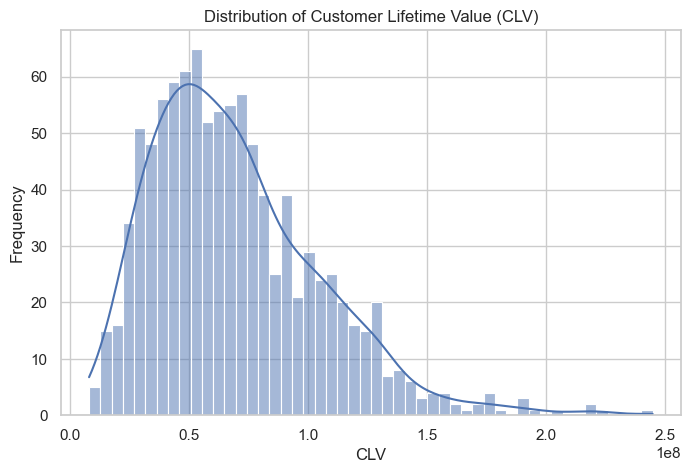

<Figure size 640x480 with 0 Axes>

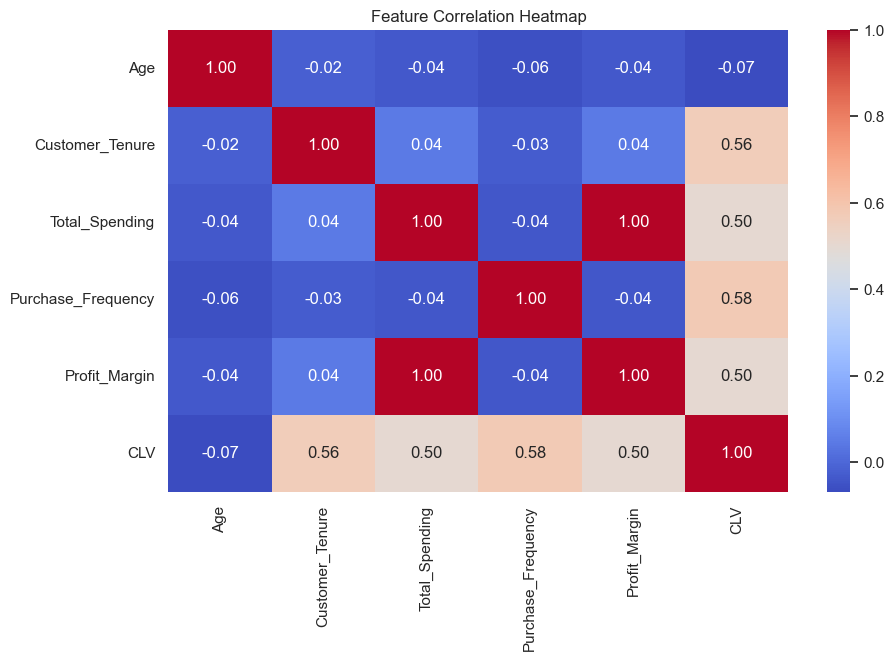

<Figure size 640x480 with 0 Axes>

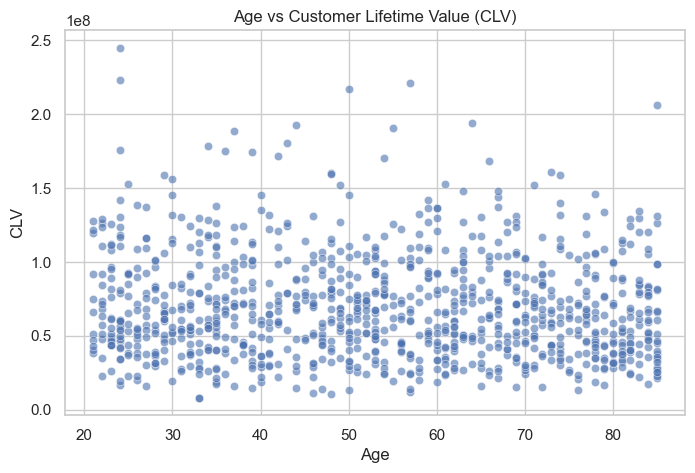

<Figure size 640x480 with 0 Axes>

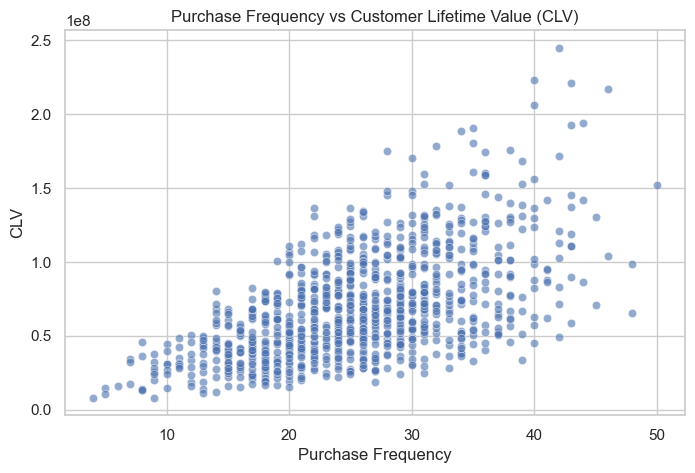

<Figure size 640x480 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# 1️⃣ CLV Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data["CLV"], bins=50, kde=True)
plt.title("Distribution of Customer Lifetime Value (CLV)")
plt.xlabel("CLV")
plt.ylabel("Frequency")
plt.show()
plt.savefig("histogram.png", dpi=300)

# 2️⃣ Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data[["Age", "Customer_Tenure", "Total_Spending", "Purchase_Frequency", "Profit_Margin", "CLV"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()
plt.savefig("heatmap.png", dpi=300)

# 3️⃣ Age vs CLV
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data["Age"], y=data["CLV"], alpha=0.6)
plt.title("Age vs Customer Lifetime Value (CLV)")
plt.xlabel("Age")
plt.ylabel("CLV")
plt.show()
plt.savefig("age_vs_clv.png", dpi=300)

# 4️⃣ Purchase Frequency vs CLV
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data["Purchase_Frequency"], y=data["CLV"], alpha=0.6)
plt.title("Purchase Frequency vs Customer Lifetime Value (CLV)")
plt.xlabel("Purchase Frequency")
plt.ylabel("CLV")
plt.show()
plt.savefig("purchase_freq_vs_clv.png", dpi=300)

In [12]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=["CLV"])  # Features
y = data["CLV"]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (800, 34)
Testing set size: (200, 34)


In [13]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,...,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,Age,Customer_Tenure,Total_Spending,Purchase_Frequency,Profit_Margin,CLV
0,1,1991,PhD,Together,148884.56,1,1,2017-03-26,78,0,...,7,2,46,1800,34,2941,2089,31,626.7,57136865.7
1,2,1954,Graduation,Widow,167658.20,1,1,2018-07-12,87,0,...,1,11,18,3221,71,2468,2263,18,678.9,30159453.6
2,3,2000,2n Cycle,Widow,149392.85,2,2,2015-04-11,88,0,...,14,14,19,4203,25,3656,2197,38,659.1,91567444.8
3,4,1960,2n Cycle,Married,32855.81,0,2,2011-09-09,0,0,...,14,19,42,3062,65,4966,2333,31,699.9,107746805.4
4,5,1963,PhD,Married,151918.44,0,1,2018-05-31,6,0,...,4,7,6,3478,62,2510,1972,18,591.6,26728488.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1993,Master,Together,90749.39,2,2,2011-02-08,13,0,...,2,8,37,3373,32,5179,1909,15,572.7,44490199.5
996,997,2004,2n Cycle,Married,59281.85,1,2,2012-06-11,92,0,...,8,7,15,149,21,4690,2515,36,754.5,127389780.0
997,998,1990,2n Cycle,Married,160667.17,1,2,2017-06-18,19,0,...,5,17,4,3706,35,2857,1202,21,360.6,21634918.2
998,999,1992,2n Cycle,Single,68619.51,2,1,2019-04-06,29,0,...,14,14,39,4567,33,2200,3637,33,1091.1,79213860.0


In [14]:
data = pd.get_dummies(data, columns=['Education', 'Marital_Status'], drop_first=True)

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

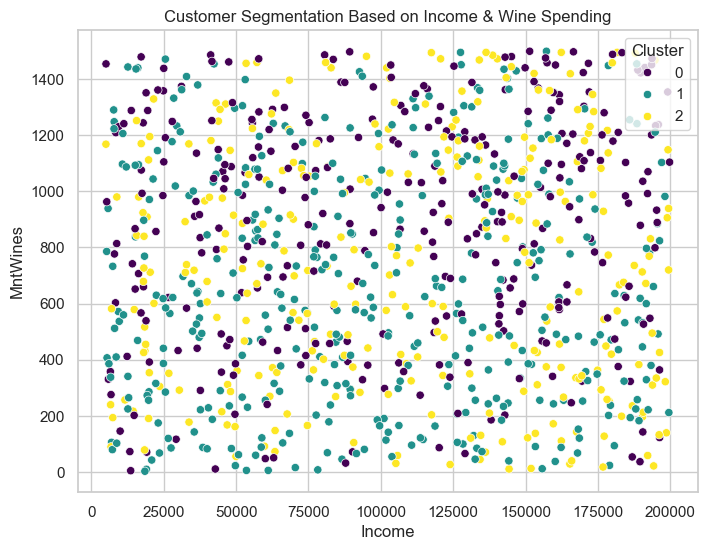

<Figure size 640x480 with 0 Axes>

In [16]:
features = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
X = data[features]

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Income'], y=data['MntWines'], hue=data['Cluster'], palette="viridis")
plt.title("Customer Segmentation Based on Income & Wine Spending")
plt.show()
plt.savefig("customer_segmentation")

MAE: 27.968400000000038
RMSE: 51.45854238122176
R² Score: 0.9999511552349455


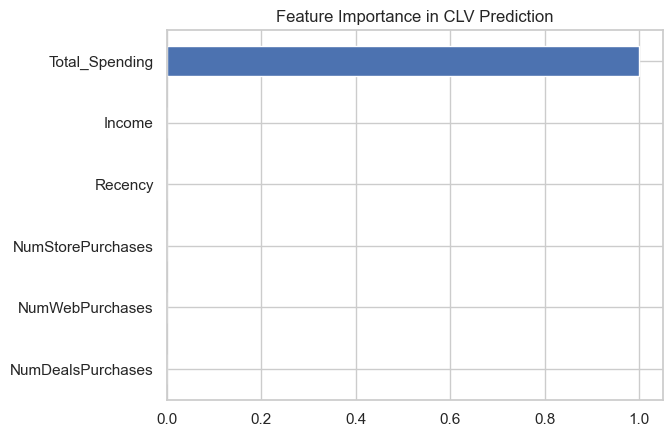

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
file_path = "customer_data.csv"
df = pd.read_csv(file_path)

# Handle missing values
df.dropna(inplace=True)

# Convert categorical variables
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)

# Create Total Spending Feature
df['Total_Spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Define CLV as proxy (12 months revenue prediction)
df['CLV'] = df['Total_Spending'] * 12  

# Feature Selection
features = ['Income', 'Recency', 'Total_Spending', 'NumDealsPurchases', 'NumWebPurchases', 'NumStorePurchases']
X = df[features]
y = df['CLV']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf_model.predict(X_test_scaled)

# Model Evaluation
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

# Feature Importance
importance = pd.Series(rf_model.feature_importances_, index=features)
importance.sort_values().plot(kind='barh', title="Feature Importance in CLV Prediction")
plt.show()